In [ ]:
#Do not need to run this line
#!mamba install -qy gmt pygmt

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import xarray as xr
import cartopy.crs as ccrs
import cartopy
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')

/srv/conda/envs/notebook/lib/python3.8/site-packages/holoviews/core/element.py:74: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if key is ():
/srv/conda/envs/notebook/lib/python3.8/site-packages/holoviews/core/layout.py:225: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if key is ():
/srv/conda/envs/notebook/lib/python3.8/site-packages/holoviews/element/tabular.py:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if heading is ():


In [3]:
from IPython import display
display.set_matplotlib_formats('retina')

In [4]:
data_dir = '/home/jovyan/data/bravoseis_data'

In [5]:
ds_ibsco = xr.load_dataset(data_dir + '/multibeam/temp.nc')
ds_ibsco

<xarray.Dataset>
Dimensions:  (x: 13335, y: 13341)
Coordinates:
  * x        (x) float64 -3.333e+06 -3.333e+06 ... 3.333e+06 3.334e+06
  * y        (y) float64 -3.337e+06 -3.336e+06 ... 3.333e+06 3.333e+06
Data variables:
    z        (y, x) float32 inf inf inf inf inf inf ... inf inf inf inf inf inf
Attributes:
    Conventions:  CF-1.7
    title:        Produced by grdconvert
    history:      grdconvert ibcso_v1_bed.grd -Gtemp.nc\n\t(old cmd) Created ...
    description:  Polar Stereographic projection with truescale at 71 degree S
    GMT_version:  6.3.0 [64-bit]

In [6]:
ds_ibsco = ds_ibsco.sel(x=slice(-2800000, -2400000),y = slice(1333250,1740000))

In [7]:
col_names = ['station','lon','lat','depth'] 
col_names2 = ['lat','lon','depth'] 
dredge_cols = ['Date Collected', 'PRR_num','Primary Field #', 'Ocean/Sea' , 'Rock Name',
               'Description', 'Notes', 'Specific Gravity', 'sus_si', 'Weight',
               'Vessel Name', 'Field Year', 'Object', 'Depth0', 'Depth1',
               'lat1', 'lat0', 'lon1', 'lon0']

In [8]:
df_bathy = pd.read_csv(data_dir + '/multibeam/B6_19-20_trimmed.txt',
                  sep=' ', header=0, names=col_names2,
                  dtype = {'lon': np.float32,'lat': np.float32, 'depth': np.float32})
# cond1 = df_bathy["lat"] < -62    
# cond2 = df_bathy["lat"] > -63.5
# cond3 = df_bathy["lon"] > -61
# cond4 = df_bathy["lon"] < -56.5

# df_bathy = df_bathy[cond1 & cond2 & cond3 & cond4].copy()

df_bathy.tail()

,lat,lon,depth
20792152,-62.13316,-57.196842,-1744.340942
20792153,-62.13316,-57.196552,-1744.340942
20792154,-62.13316,-57.196266,-1745.762939
20792155,-62.13316,-57.195980,-1745.806396
20792156,-62.13316,-57.195690,-1745.874512


In [9]:
df_stations = pd.read_csv(data_dir + '/multibeam/stations.csv',
                  sep=',', header=0, names=col_names,
                  dtype = {'station': str, 'lon': np.float64,
                           'lat': np.float64, 'depth': np.float64})

df_stations.head(10)

,station,lon,lat,depth
0,BRA28,-60.19965,-62.9151,1019.0
1,BRA29,-59.45024,-62.8499,1236.0
2,BRA30,-58.89979,-62.5159,1538.0
3,BRA31,-58.00078,-62.5334,1765.0
4,BRA32,-58.00000,-62.2974,1928.0
5,BRA33,-57.09978,-62.2498,1717.0


In [12]:
df_dredge = pd.read_csv(data_dir + '/dredge_samples.csv',
                  sep=',', header=0, names=dredge_cols,
                  dtype = {'station': str, 'lon': np.float64,
                           'lat': np.float64, 'depth': np.float64})

df_dredge.head(5)

,Date Collected,PRR_num,Primary Field #,Ocean/Sea,Rock Name,Description,Notes,Specific Gravity,sus_si,Weight,Vessel Name,Field Year,Object,Depth0,Depth1,lat1,lat0,lon1,lon0
0,2/14/93,PRR-52411,NBP9301-D2-C,Bransfield Strait,Basalt,"Highly vesicular basalt, aphyric, contains glass.",Inner caldera wall of large seamount. Dredges...,1.550,639,834,Nathaniel B Palmer,1993,Dredge,700,1080,-62.4383,-62.4383,-58.405,-58.405
1,2/14/93,PRR-52412,NBP9301-D2-D,Bransfield Strait,Basalt,"Slightly vesicular basalt, plagioclase, does n...",Inner caldera wall of large seamount. Dredges...,2.071,555,600,Nathaniel B Palmer,1993,Dredge,700,1080,-62.4383,-62.4383,-58.405,-58.405
2,2/14/93,PRR-52413,NBP9301-D2-E,Bransfield Strait,Basalt,"Highly vesicular basalt, plagioclase, contains...",Inner caldera wall of large seamount. Dredges...,1.990,303,883,Nathaniel B Palmer,1993,Dredge,700,1080,-62.4383,-62.4383,-58.405,-58.405
3,2/14/93,PRR-52414,NBP9301-D2-F,Bransfield Strait,Basalt,"Moderately vesicular basalt, plagioclase, does...",Inner caldera wall of large seamount. Dredges...,2.000,653,999,Nathaniel B Palmer,1993,Dredge,700,1080,-62.4383,-62.4383,-58.405,-58.405
4,2/14/93,PRR-52415,NBP9301-D2-H,Bransfield Strait,Basalt,"Slightly vesicular, moderate plagioclase, rare...",Inner caldera wall of large seamount. Dredges...,2.152,341,2265,Nathaniel B Palmer,1993,Dredge,700,1080,-62.4383,-62.4383,-58.405,-58.405


In [13]:
df_dredge = pd.read_csv(data_dir + '/dredge_samples.csv',
                  sep=',', header=0, names=dredge_cols,
                  dtype = {'station': str, 'lon': np.float64,
                           'lat': np.float64, 'depth': np.float64})
df_dredge['sus_si'] = df_dredge['sus_si'] * 10e-5

df_dredge.head(5)

,Date Collected,PRR_num,Primary Field #,Ocean/Sea,Rock Name,Description,Notes,Specific Gravity,sus_si,Weight,Vessel Name,Field Year,Object,Depth0,Depth1,lat1,lat0,lon1,lon0
0,2/14/93,PRR-52411,NBP9301-D2-C,Bransfield Strait,Basalt,"Highly vesicular basalt, aphyric, contains glass.",Inner caldera wall of large seamount. Dredges...,1.550,0.0639,834,Nathaniel B Palmer,1993,Dredge,700,1080,-62.4383,-62.4383,-58.405,-58.405
1,2/14/93,PRR-52412,NBP9301-D2-D,Bransfield Strait,Basalt,"Slightly vesicular basalt, plagioclase, does n...",Inner caldera wall of large seamount. Dredges...,2.071,0.0555,600,Nathaniel B Palmer,1993,Dredge,700,1080,-62.4383,-62.4383,-58.405,-58.405
2,2/14/93,PRR-52413,NBP9301-D2-E,Bransfield Strait,Basalt,"Highly vesicular basalt, plagioclase, contains...",Inner caldera wall of large seamount. Dredges...,1.990,0.0303,883,Nathaniel B Palmer,1993,Dredge,700,1080,-62.4383,-62.4383,-58.405,-58.405
3,2/14/93,PRR-52414,NBP9301-D2-F,Bransfield Strait,Basalt,"Moderately vesicular basalt, plagioclase, does...",Inner caldera wall of large seamount. Dredges...,2.000,0.0653,999,Nathaniel B Palmer,1993,Dredge,700,1080,-62.4383,-62.4383,-58.405,-58.405
4,2/14/93,PRR-52415,NBP9301-D2-H,Bransfield Strait,Basalt,"Slightly vesicular, moderate plagioclase, rare...",Inner caldera wall of large seamount. Dredges...,2.152,0.0341,2265,Nathaniel B Palmer,1993,Dredge,700,1080,-62.4383,-62.4383,-58.405,-58.405


In [14]:
url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/srtm30plus_v6'

In [72]:
padding = 0
extents = [-58.8-padding,-58+padding, -62.6-padding/2, -62.3+padding/2]
extents

[-58.8, -58, -62.6, -62.3]

In [73]:
df_dredge['midX'] = (df_dredge.lon0.values + df_dredge.lon1.values) / 2

df_dredge['midY'] = (df_dredge.lat0.values + df_dredge.lat1.values) / 2
#df_dredge.head(20)

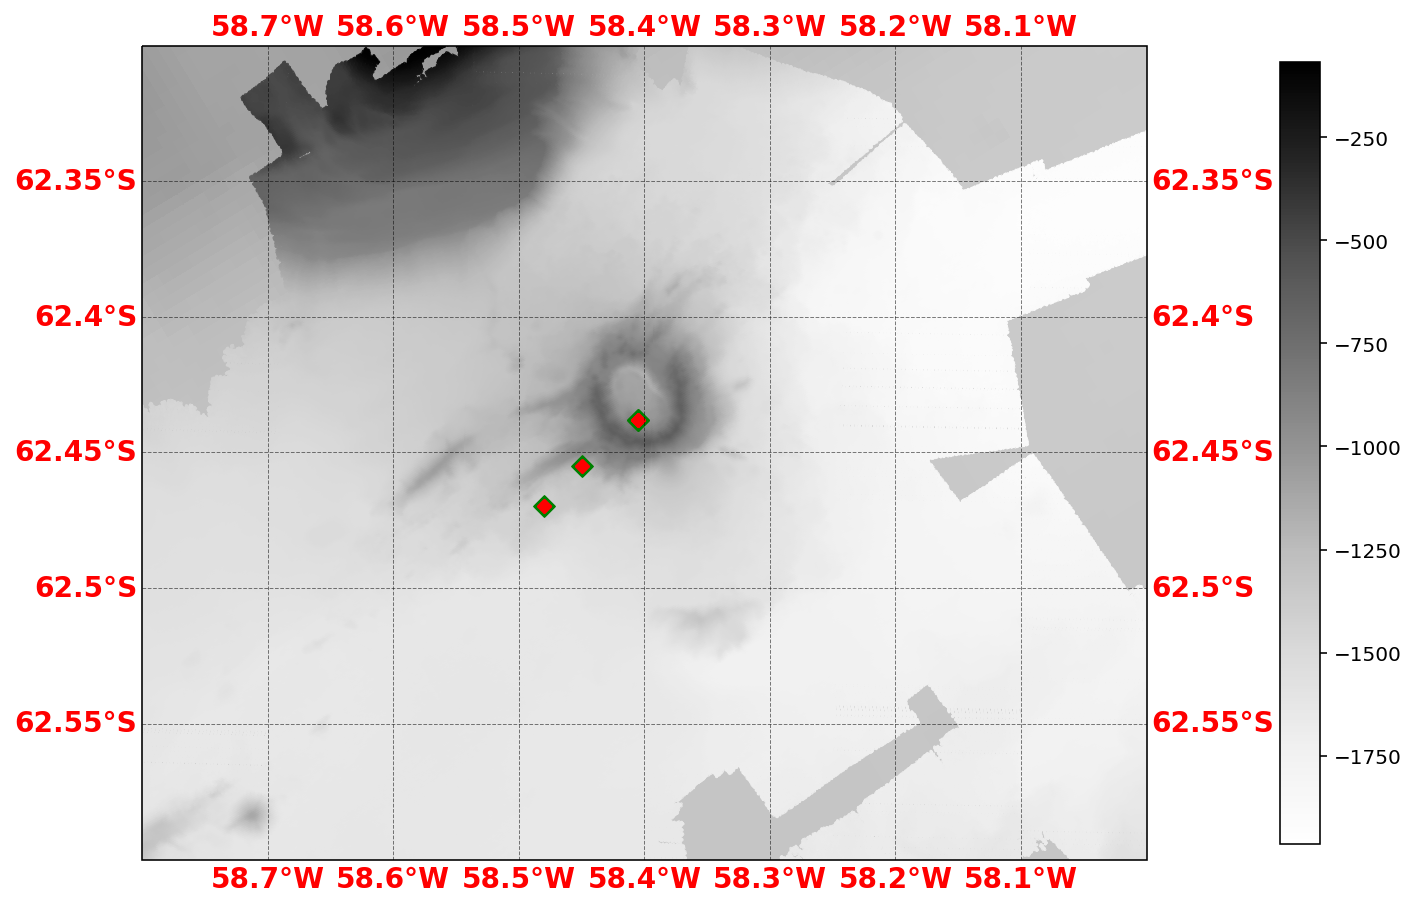

In [74]:
plt.close()
central_lon = np.mean(extents[0:2])
central_lat = np.mean(extents[2:4])
plt.rcParams['figure.figsize'] = (12,12)
ax = plt.axes(projection=ccrs.Mercator(central_longitude=central_lon, min_latitude=extents[2], max_latitude=extents[3], globe=None, latitude_true_scale=central_lat))
ax.set_extent(extents)
orca_decimate = df_bathy.iloc[::10, :]
ax.coastlines()
sc = ds_ibsco.z.plot(ax=ax, transform=ccrs.SouthPolarStereo(true_scale_latitude=-71), cmap='Greys', **{'add_colorbar':False})
dc = ax.scatter(orca_decimate.lon, orca_decimate.lat, c=orca_decimate.depth,
         s=0.2, transform=ccrs.PlateCarree(), cmap='Greys')
plt.colorbar(dc, shrink=0.6, pad = 0.1)
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=0.5, linestyle='--')
gl.xlabel_style = {'color': 'red', 'weight': 'bold', 'size': 14}
gl.ylabel_style = {'color': 'red', 'weight': 'bold', 'size': 14}
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
# #ac = ax.scatter(df_eqs.ep_lon,
#                 df_eqs.ep_lat,
#                 transform= ccrs.PlateCarree(),
#                s=np.power(df_eqs.normalized*4, 4), c = c_dict)
# sc = ax.scatter(df_stations.lon,df_stations.lat, c = 'r',marker='D',
#           s=125, transform=ccrs.PlateCarree())

sc = ax.scatter(df_dredge.midX,df_dredge.midY, c = 'g',marker='D',
          s=50, transform=ccrs.PlateCarree())

sg = ax.scatter(df_dredge.lon0,df_dredge.lat0, c = 'r',marker='D',
          s=20, transform=ccrs.PlateCarree())


# plt.savefig('figures/eqs.png')

array([[<AxesSubplot:title={'center':'Specific Gravity'}>,
        <AxesSubplot:title={'center':'sus_si'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Field Year'}>,
        <AxesSubplot:title={'center':'Depth0'}>,
        <AxesSubplot:title={'center':'Depth1'}>],
       [<AxesSubplot:title={'center':'lat1'}>,
        <AxesSubplot:title={'center':'lat0'}>,
        <AxesSubplot:title={'center':'lon1'}>],
       [<AxesSubplot:title={'center':'lon0'}>,
        <AxesSubplot:title={'center':'midX'}>,
        <AxesSubplot:title={'center':'midY'}>]], dtype=object)

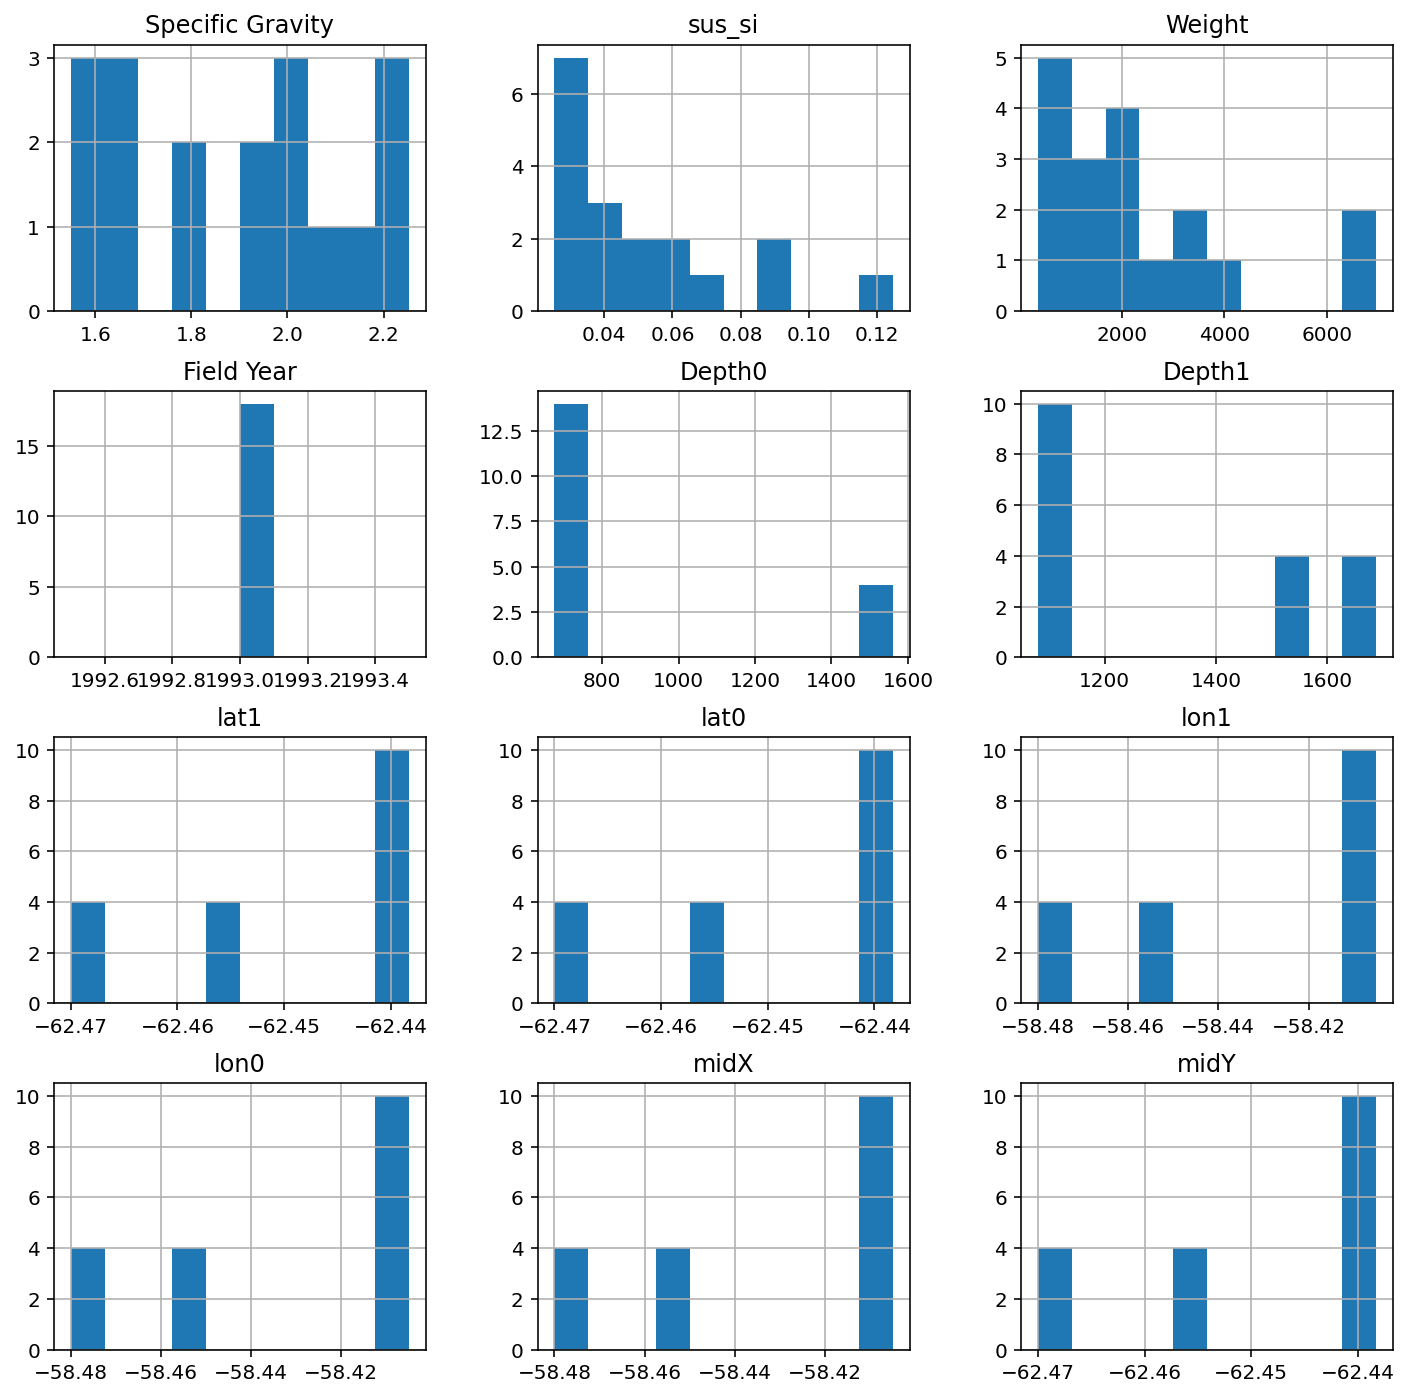

In [78]:
df_dredge.hist()

In [15]:
df_dredge.describe()

,Specific Gravity,sus_si,Weight,Field Year,Depth0,Depth1,lat1,lat0,lon1,lon0
count,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.885889,0.050983,2375.277778,1993.0,885.555556,1321.777778,-62.449056,-62.449056,-58.431667,-58.431667
std,0.244913,0.026145,1904.222176,0.0,371.098880,281.596197,0.013401,0.013401,0.032358,0.032358
min,1.549000,0.025400,350.000000,1993.0,675.000000,1080.000000,-62.470000,-62.470000,-58.480000,-58.480000
25%,1.634000,0.034275,1047.750000,1993.0,700.000000,1080.000000,-62.455000,-62.455000,-58.450000,-58.450000
50%,1.908000,0.039100,1937.500000,1993.0,700.000000,1080.000000,-62.438300,-62.438300,-58.405000,-58.405000
75%,2.053250,0.061800,2947.500000,1993.0,700.000000,1560.000000,-62.438300,-62.438300,-58.405000,-58.405000
max,2.253000,0.124500,6970.000000,1993.0,1560.000000,1688.000000,-62.438300,-62.438300,-58.405000,-58.405000


In [18]:
df_dredge.hvplot.scatter('sus_si','Specific Gravity')

:Scatter   [sus_si]   (Specific Gravity)

In [83]:
df_caldera=df_dredge.loc[(df_dredge['midX']> -58.406)]
df_dredge2.describe()

,Specific Gravity,sus_si,Weight,Field Year,Depth0,Depth1,lat1,lat0,lon1,lon0,midX,midY
count,10.000000,10.000000,10.000000,10.0,10.0,10.0,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,1.838800,0.058330,1927.500000,1993.0,700.0,1080.0,-6.243830e+01,-6.243830e+01,-5.840500e+01,-5.840500e+01,-5.840500e+01,-6.243830e+01
std,0.215632,0.028911,1857.845063,0.0,0.0,0.0,1.497956e-14,1.497956e-14,1.497956e-14,1.497956e-14,1.497956e-14,1.497956e-14
min,1.550000,0.030300,600.000000,1993.0,700.0,1080.0,-6.243830e+01,-6.243830e+01,-5.840500e+01,-5.840500e+01,-5.840500e+01,-6.243830e+01
25%,1.631000,0.036625,912.000000,1993.0,700.0,1080.0,-6.243830e+01,-6.243830e+01,-5.840500e+01,-5.840500e+01,-5.840500e+01,-6.243830e+01
50%,1.864500,0.051900,1424.500000,1993.0,700.0,1080.0,-6.243830e+01,-6.243830e+01,-5.840500e+01,-5.840500e+01,-5.840500e+01,-6.243830e+01
75%,1.997500,0.064950,1938.750000,1993.0,700.0,1080.0,-6.243830e+01,-6.243830e+01,-5.840500e+01,-5.840500e+01,-5.840500e+01,-6.243830e+01
max,2.152000,0.124500,6970.000000,1993.0,700.0,1080.0,-6.243830e+01,-6.243830e+01,-5.840500e+01,-5.840500e+01,-5.840500e+01,-6.243830e+01


In [81]:
df_dredge3=df_dredge.loc[(df_dredge['midX']> -58.451) & (df_dredge['midX']< -58.406)]
df_dredge3.describe()

,Specific Gravity,sus_si,Weight,Field Year,Depth0,Depth1,lat1,lat0,lon1,lon0,midX,midY
count,4.000000,4.000000,4.000000,4.0,4.0,4.0,4.000,4.000,4.00,4.00,4.00,4.000
mean,1.712250,0.038525,1887.500000,1993.0,675.0,1560.0,-62.455,-62.455,-58.45,-58.45,-58.45,-62.455
std,0.158134,0.005377,1433.559091,0.0,0.0,0.0,0.000,0.000,0.00,0.00,0.00,0.000
min,1.549000,0.033700,350.000000,1993.0,675.0,1560.0,-62.455,-62.455,-58.45,-58.45,-58.45,-62.455
25%,1.607500,0.035875,1002.500000,1993.0,675.0,1560.0,-62.455,-62.455,-58.45,-58.45,-58.45,-62.455
50%,1.696000,0.037100,1765.000000,1993.0,675.0,1560.0,-62.455,-62.455,-58.45,-58.45,-58.45,-62.455
75%,1.800750,0.039750,2650.000000,1993.0,675.0,1560.0,-62.455,-62.455,-58.45,-58.45,-58.45,-62.455
max,1.908000,0.046200,3670.000000,1993.0,675.0,1560.0,-62.455,-62.455,-58.45,-58.45,-58.45,-62.455


In [82]:
df_dredge4=df_dredge.loc[(df_dredge['midX']< -58.451)]
df_dredge4.describe()

,Specific Gravity,sus_si,Weight,Field Year,Depth0,Depth1,lat1,lat0,lon1,lon0,midX,midY
count,4.000000,4.000000,4.000000,4.0,4.0,4.0,4.00,4.00,4.00,4.00,4.00,4.00
mean,2.177250,0.045075,3982.500000,1993.0,1560.0,1688.0,-62.47,-62.47,-58.48,-58.48,-58.48,-62.47
std,0.120925,0.030063,1925.623276,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
min,1.997000,0.025400,2580.000000,1993.0,1560.0,1688.0,-62.47,-62.47,-58.48,-58.48,-58.48,-62.47
25%,2.164250,0.029075,2947.500000,1993.0,1560.0,1688.0,-62.47,-62.47,-58.48,-58.48,-58.48,-62.47
50%,2.229500,0.032550,3265.000000,1993.0,1560.0,1688.0,-62.47,-62.47,-58.48,-58.48,-58.48,-62.47
75%,2.242500,0.048550,4300.000000,1993.0,1560.0,1688.0,-62.47,-62.47,-58.48,-58.48,-58.48,-62.47
max,2.253000,0.089800,6820.000000,1993.0,1560.0,1688.0,-62.47,-62.47,-58.48,-58.48,-58.48,-62.47


In [ ]:
-58.480 -58.450 -58.405 